In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\Luis\Downloads\INFLUD-30-06-2020.csv'
df = pd.read_csv(filename, delimiter=';', 
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

c:\users\luis\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18,59,61,62,63,103,105,117,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
for k in (18,59,61,62,63,103,105,117,119,126,128,129,130,132): print (k, df.columns[k])

18 CS_ETINIA
59 DT_VAC_MAE
61 DT_DOSEUNI
62 DT_1_DOSE
63 DT_2_DOSE
103 FLUASU_OUT
105 FLUBLI_OUT
117 DS_PCR_OUT
119 CLASSI_OUT
126 PAIS_VGM
128 LO_PS_VGM
129 DT_VGM
130 DT_RT_VGM
132 PAC_COCBO


In [4]:
df.shape

(356188, 134)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356188 entries, 0 to 356187
Columns: 134 entries, DT_NOTIFIC to PAC_DSCBO
dtypes: float64(76), int64(10), object(48)
memory usage: 298.9+ MB


In [6]:
for par in enumerate(df.columns): print (par)

(0, 'DT_NOTIFIC')
(1, 'SEM_NOT')
(2, 'DT_SIN_PRI')
(3, 'SEM_PRI')
(4, 'SG_UF_NOT')
(5, 'ID_REGIONA')
(6, 'CO_REGIONA')
(7, 'ID_MUNICIP')
(8, 'CO_MUN_NOT')
(9, 'ID_UNIDADE')
(10, 'CO_UNI_NOT')
(11, 'CS_SEXO')
(12, 'DT_NASC')
(13, 'NU_IDADE_N')
(14, 'TP_IDADE')
(15, 'COD_IDADE')
(16, 'CS_GESTANT')
(17, 'CS_RACA')
(18, 'CS_ETINIA')
(19, 'CS_ESCOL_N')
(20, 'ID_PAIS')
(21, 'CO_PAIS')
(22, 'SG_UF')
(23, 'ID_RG_RESI')
(24, 'CO_RG_RESI')
(25, 'ID_MN_RESI')
(26, 'CO_MUN_RES')
(27, 'CS_ZONA')
(28, 'SURTO_SG')
(29, 'NOSOCOMIAL')
(30, 'AVE_SUINO')
(31, 'FEBRE')
(32, 'TOSSE')
(33, 'GARGANTA')
(34, 'DISPNEIA')
(35, 'DESC_RESP')
(36, 'SATURACAO')
(37, 'DIARREIA')
(38, 'VOMITO')
(39, 'OUTRO_SIN')
(40, 'OUTRO_DES')
(41, 'PUERPERA')
(42, 'CARDIOPATI')
(43, 'HEMATOLOGI')
(44, 'SIND_DOWN')
(45, 'HEPATICA')
(46, 'ASMA')
(47, 'DIABETES')
(48, 'NEUROLOGIC')
(49, 'PNEUMOPATI')
(50, 'IMUNODEPRE')
(51, 'RENAL')
(52, 'OBESIDADE')
(53, 'OBES_IMC')
(54, 'OUT_MORBI')
(55, 'MORB_DESC')
(56, 'VACINA')
(57, 'DT_UT_DOS

In [7]:
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

In [8]:
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])
df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])
df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['DT_NOTIFIC'].dropna(inplace=True)

In [9]:
df.sample(10)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,IF_PARA3,IF_ADENO,IF_OUTRO,DS_IF_OUT,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
124473,12/05/2020,20,07/05/2020,19,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SANTA CATARINA,2688603,M,25/12/1970,49,3,3049,6,Ignorado,NaN,Ignorado,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,2.0,12/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,14/05/2020,15/05/2020,12/05/2020,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350565,06/04/2020,15,27/03/2020,13,PE,001,1497.0,JABOATAO DOS GUARARAPES,260790,UPA EDUARDO CAMPOS,7345259,F,17/08/1966,53,3,3053,5,Ignorado,NaN,Ignorado,BRASIL,1,PE,001,1497.0,JABOATAO DOS GUARARAPES,260790.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,08/04/2020,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1.0,NaN,19/06/2020,29/06/2020,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
97776,01/05/2020,18,27/04/2020,18,MG,BELO HORIZONTE,1449.0,BETIM,310670,HOSPITAL PUBLICO REGIONAL PREFEITO OSVALDO REZ...,2126494,M,17/05/1945,74,3,3074,6,Ignorado,NaN,Ignorado,BRASIL,1,MG,BELO HORIZONTE,1449.0,MARIO CAMPOS,314015.0,2.0,9.0,9.0,9.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,2.0,08/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,06/05/2020,NaN,05/05/2020,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355496,27/06/2020,26,27/06/2020,26,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSP MUN CARMEN PRUDENTE,5420938,M,13/06/1930,90,3,3090,6,Parda,NaN,Ignorado,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/06/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91409,03/05/2020,19,27/04/2020,18,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL LEFORTE,6283993,M,16/02/1937,83,3,3083,6,Ignorado,NaN,Ignorado,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,03/05/2020,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244654,08/06/2020,24,31/05/2020,23,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,HOSPITAL MARCELINO CHAMPAGNAT,6878318,M,27/09/1975,44,3,3044,6,Ignorado,NaN,Médio,BRASIL,1,PR,02RS METROPOLITANA,1356.0,SAO JOSE DOS PINHAIS,412550.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,1.0,10/06/2020,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1.0,11/06/2020,12/06/2020,09/06/2020,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
187695,27/05/2020,22,23/05/2020,21,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL E MATERNIDADE SALVALUS,9554157,F,03/01/1974,46,3,3046,9,Ignorado,NaN,Ignorado,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,NaN,NaN,NaN,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27/05/2020,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259598,25/04/2020,17,25/04/2020,17,PA,09 REGIONAL DE PROTECAO SOCIAL,1492.0,ALENQUER,150040,HOSPITAL SA

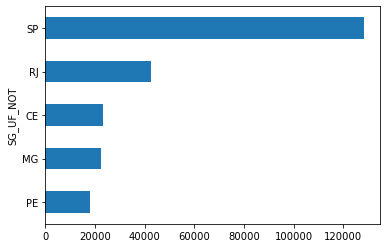

In [10]:
df.groupby('SG_UF_NOT').size().sort_values().tail(5).plot(kind='barh')

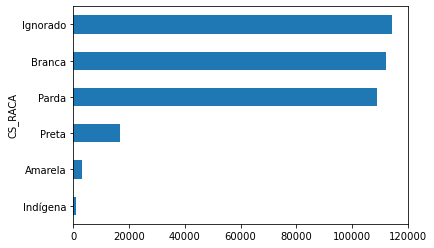

In [11]:
df.groupby('CS_RACA').size().sort_values().plot(kind='barh')

In [12]:
df.groupby('CS_RACA').size().sort_values()

CS_RACA
Indígena       955
Amarela       3123
Preta        16796
Parda       108838
Branca      112116
Ignorado    114360
dtype: int64

In [13]:
df.groupby('CS_ESCOL_N').size().sort_values(ascending=False)

CS_ESCOL_N
Ignorado         225631
Médio             36922
Fund1             31913
Fund2             20960
Superior          18363
Não se aplica     12636
Sem                9763
dtype: int64

In [14]:
df.query('HISTO_VGM == 1')['HISTO_VGM'].value_counts()

1    1006
Name: HISTO_VGM, dtype: int64

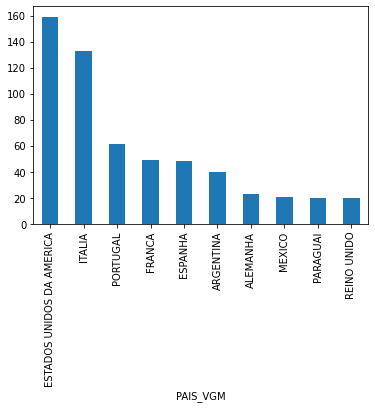

In [15]:
df.query('HISTO_VGM == 1 and PAIS_VGM != "BRASIL"').groupby('PAIS_VGM').size().sort_values(ascending=False).head(10).plot(kind='bar')

In [16]:
df.query('CARDIOPATI == 1')['CARDIOPATI'].value_counts()

1.0    105142
Name: CARDIOPATI, dtype: int64

In [17]:
df.query('DIABETES == 1')['DIABETES'].value_counts()

1.0    75920
Name: DIABETES, dtype: int64

In [18]:
df.query('OBESIDADE == 1')['OBESIDADE'].value_counts()

1.0    9851
Name: OBESIDADE, dtype: int64

In [19]:
df.query('NU_IDADE_N >= 60')['NU_IDADE_N'].count()

169987

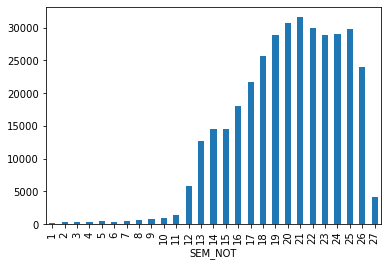

In [20]:
df.groupby('SEM_NOT').size().plot(kind='bar')

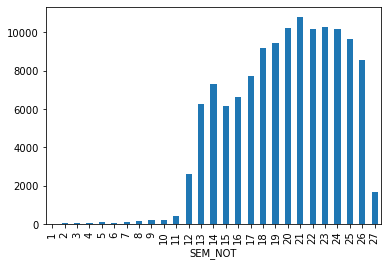

In [21]:
df.query('SG_UF_NOT == "SP"').groupby('SEM_NOT').size().plot(kind='bar')

# Dados das Capitais dos estados 30/06/2020

## NORTE

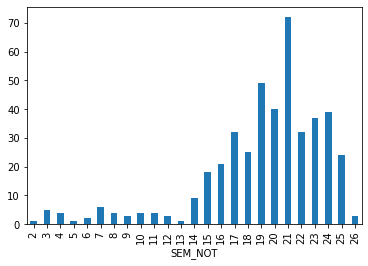

In [22]:
df.query('ID_MUNICIP == "RIO BRANCO"').groupby('SEM_NOT').size().plot(kind='bar')

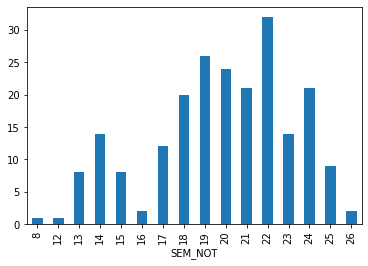

In [23]:
df.query('ID_MUNICIP == "MACAPA"').groupby('SEM_NOT').size().plot(kind='bar')

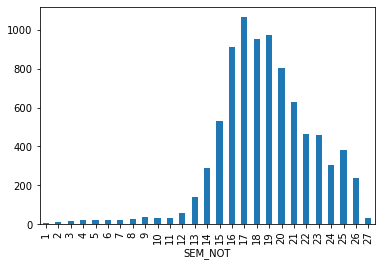

In [24]:
df.query('ID_MUNICIP == "MANAUS"').groupby('SEM_NOT').size().plot(kind='bar')

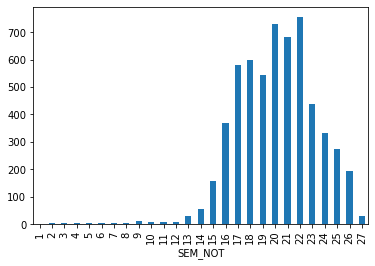

In [25]:
df.query('ID_MUNICIP == "BELEM"').groupby('SEM_NOT').size().plot(kind='bar')

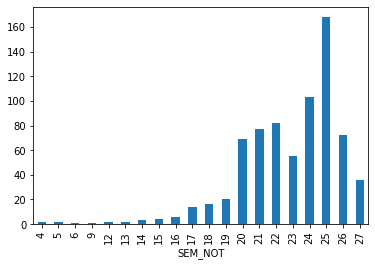

In [26]:
df.query('ID_MUNICIP == "PORTO VELHO"').groupby('SEM_NOT').size().plot(kind='bar')

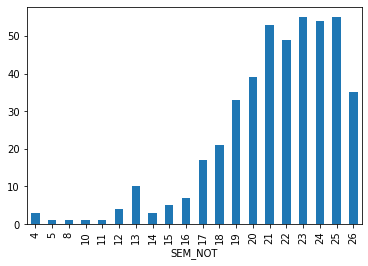

In [27]:
df.query('ID_MUNICIP == "BOA VISTA"').groupby('SEM_NOT').size().plot(kind='bar')

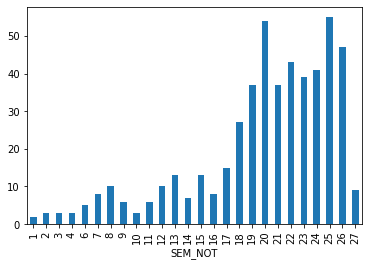

In [28]:
df.query('ID_MUNICIP == "PALMAS"').groupby('SEM_NOT').size().plot(kind='bar')

## NORDESTE

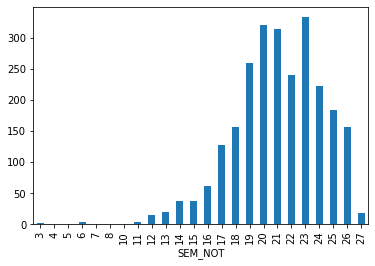

In [29]:
df.query('ID_MUNICIP == "MACEIO"').groupby('SEM_NOT').size().plot(kind='bar')

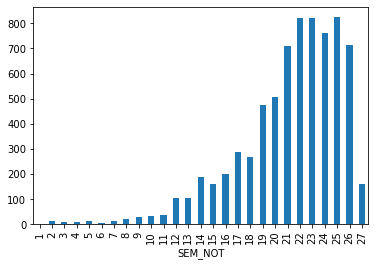

In [30]:
df.query('ID_MUNICIP == "SALVADOR"').groupby('SEM_NOT').size().plot(kind='bar')

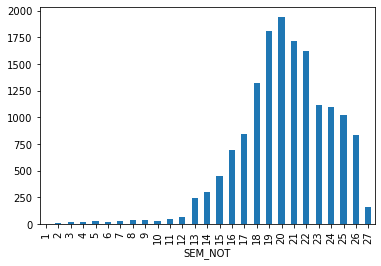

In [31]:
df.query('ID_MUNICIP == "FORTALEZA"').groupby('SEM_NOT').size().plot(kind='bar')

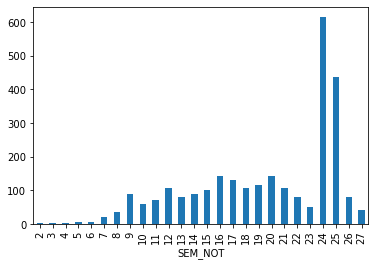

In [32]:
df.query('ID_MUNICIP == "SAO LUIS"').groupby('SEM_NOT').size().plot(kind='bar')

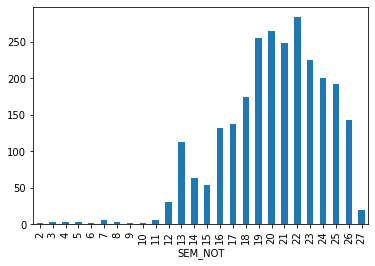

In [33]:
df.query('ID_MUNICIP == "JOAO PESSOA"').groupby('SEM_NOT').size().plot(kind='bar')

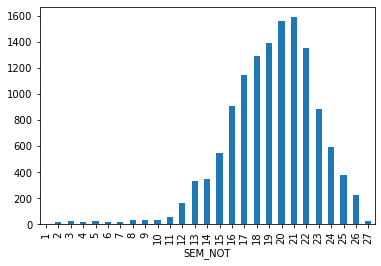

In [34]:
df.query('ID_MUNICIP == "RECIFE"').groupby('SEM_NOT').size().plot(kind='bar')

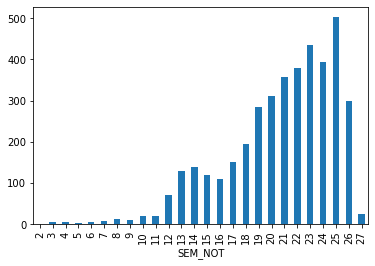

In [35]:
df.query('ID_MUNICIP == "TERESINA"').groupby('SEM_NOT').size().plot(kind='bar')

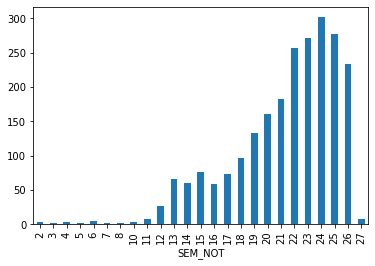

In [36]:
df.query('ID_MUNICIP == "NATAL"').groupby('SEM_NOT').size().plot(kind='bar')

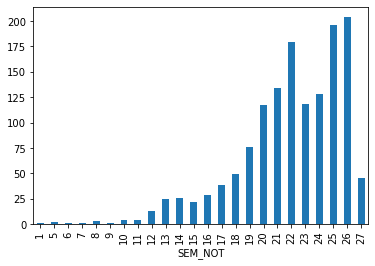

In [37]:
df.query('ID_MUNICIP == "ARACAJU"').groupby('SEM_NOT').size().plot(kind='bar')

## CENTRO-OESTE

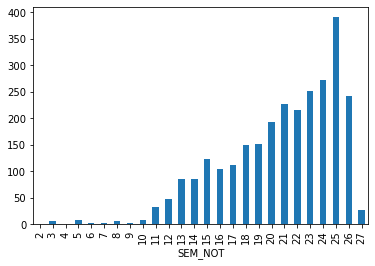

In [38]:
df.query('ID_MUNICIP == "GOIANIA"').groupby('SEM_NOT').size().plot(kind='bar')

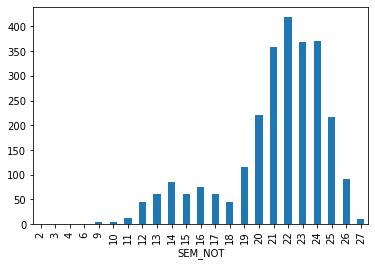

In [39]:
df.query('ID_MUNICIP == "CUIABA"').groupby('SEM_NOT').size().plot(kind='bar')

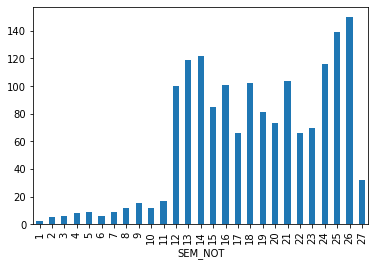

In [40]:
df.query('ID_MUNICIP == "CAMPO GRANDE"').groupby('SEM_NOT').size().plot(kind='bar')

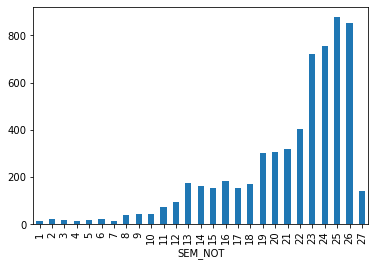

In [41]:
df.query('ID_MUNICIP == "BRASILIA"').groupby('SEM_NOT').size().plot(kind='bar')

## SUDESTE

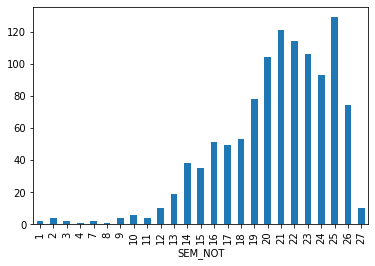

In [42]:
df.query('ID_MUNICIP == "VITORIA"').groupby('SEM_NOT').size().plot(kind='bar')

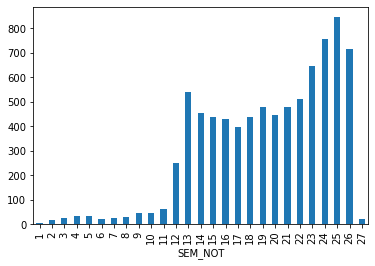

In [43]:
df.query('ID_MUNICIP == "BELO HORIZONTE"').groupby('SEM_NOT').size().plot(kind='bar')

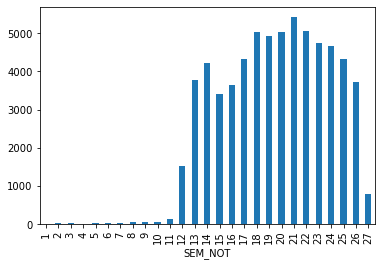

In [44]:
df.query('ID_MUNICIP == "SAO PAULO"').groupby('SEM_NOT').size().plot(kind='bar')

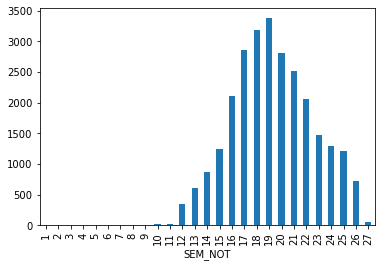

In [45]:
df.query('ID_MUNICIP == "RIO DE JANEIRO"').groupby('SEM_NOT').size().plot(kind='bar')

## SUL

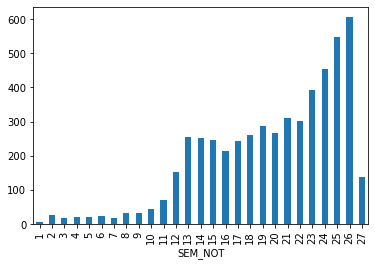

In [46]:
df.query('ID_MUNICIP == "CURITIBA"').groupby('SEM_NOT').size().plot(kind='bar')

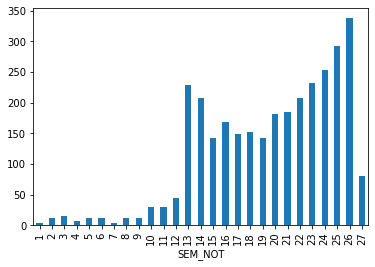

In [47]:
df.query('ID_MUNICIP == "PORTO ALEGRE"').groupby('SEM_NOT').size().plot(kind='bar')

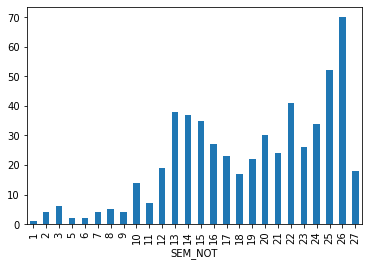

In [48]:
df.query('ID_MUNICIP == "FLORIANOPOLIS"').groupby('SEM_NOT').size().plot(kind='bar')

# Dados Vale do Paraiba 30/06/2020

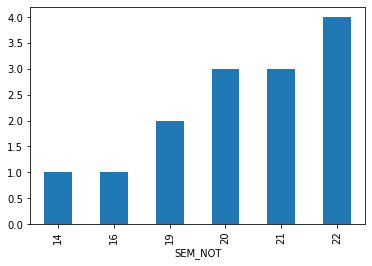

In [49]:
df.query('ID_MUNICIP == "APARECIDA"').groupby('SEM_NOT').size().plot(kind='bar')

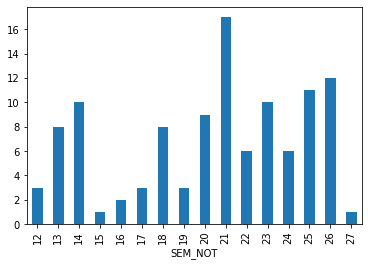

In [50]:
df.query('ID_MUNICIP == "CACAPAVA"').groupby('SEM_NOT').size().plot(kind='bar')

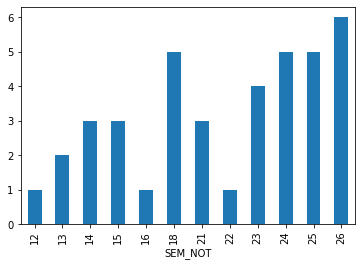

In [51]:
df.query('ID_MUNICIP == "CACHOEIRA PAULISTA"').groupby('SEM_NOT').size().plot(kind='bar')

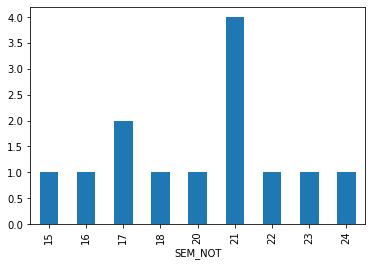

In [52]:
df.query('ID_MUNICIP == "CAMPOS DO JORDAO"').groupby('SEM_NOT').size().plot(kind='bar')

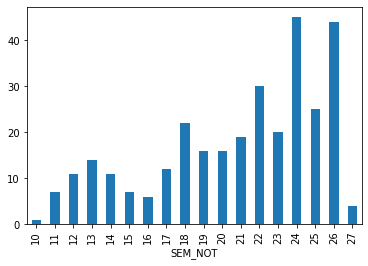

In [53]:
df.query('ID_MUNICIP == "CARAGUATATUBA"').groupby('SEM_NOT').size().plot(kind='bar')

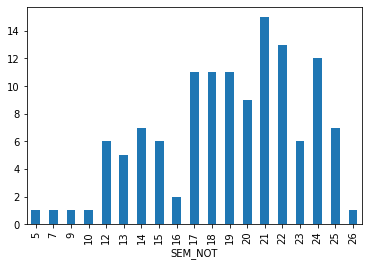

In [54]:
df.query('ID_MUNICIP == "CRUZEIRO"').groupby('SEM_NOT').size().plot(kind='bar')

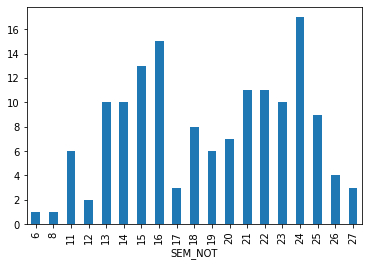

In [55]:
df.query('ID_MUNICIP == "GUARATINGUETA"').groupby('SEM_NOT').size().plot(kind='bar')

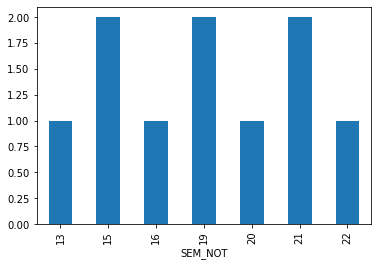

In [56]:
df.query('ID_MUNICIP == "ILHABELA"').groupby('SEM_NOT').size().plot(kind='bar')

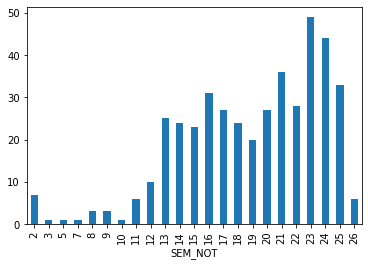

In [57]:
df.query('ID_MUNICIP == "JACAREI"').groupby('SEM_NOT').size().plot(kind='bar')

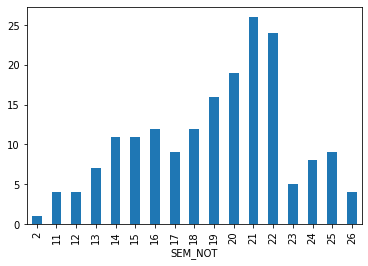

In [58]:
df.query('ID_MUNICIP == "LORENA"').groupby('SEM_NOT').size().plot(kind='bar')

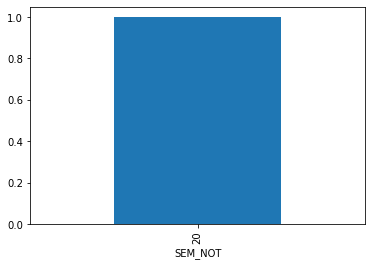

In [59]:
df.query('ID_MUNICIP == "MONTEIRO LOBATO"').groupby('SEM_NOT').size().plot(kind='bar')

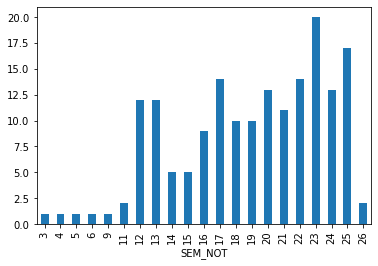

In [60]:
df.query('ID_MUNICIP == "PINDAMONHANGABA"').groupby('SEM_NOT').size().plot(kind='bar')

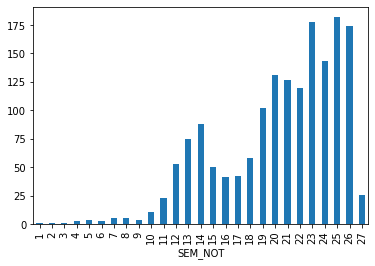

In [61]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"').groupby('SEM_NOT').size().plot(kind='bar')

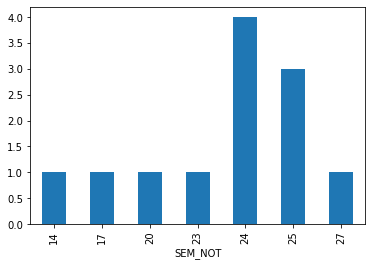

In [62]:
df.query('ID_MUNICIP == "SAO LUIS DO PARAITINGA"').groupby('SEM_NOT').size().plot(kind='bar')

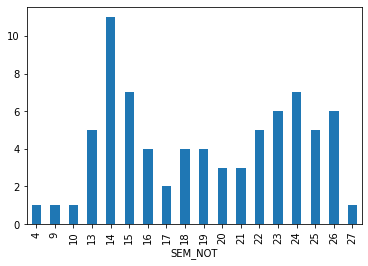

In [63]:
df.query('ID_MUNICIP == "SAO SEBASTIAO"').groupby('SEM_NOT').size().plot(kind='bar')

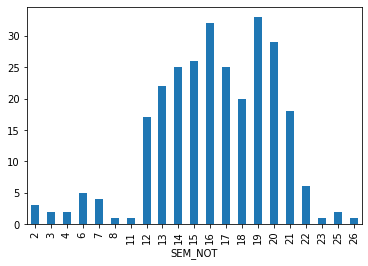

In [64]:
df.query('ID_MUNICIP == "TAUBATE"').groupby('SEM_NOT').size().plot(kind='bar')

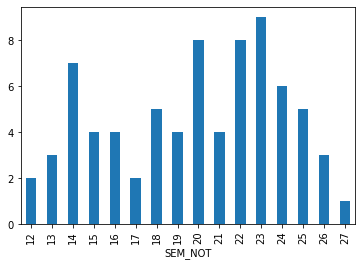

In [65]:
df.query('ID_MUNICIP == "UBATUBA"').groupby('SEM_NOT').size().plot(kind='bar')